9/28 week3 8-9장

# 8장. 그래프 만들기
- sns.scatterplot(data = 파일, x = 'x 변수', y = 'y 변수')\
  .set(xlim = [3, 6], ylim = [10, 30]

In [8]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [9]:
cd /content/drive/MyDrive/da

/content/drive/MyDrive/da


In [10]:
 import pandas as pd
 mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

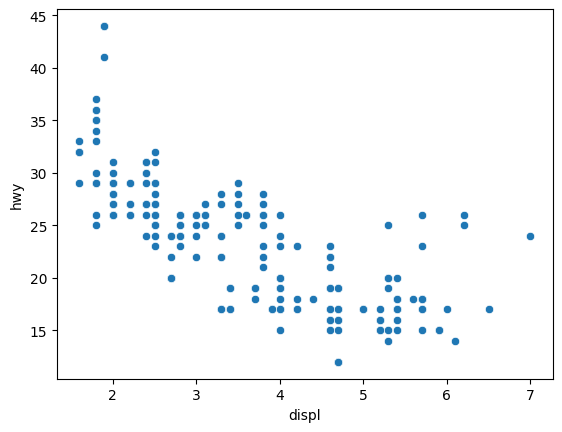

In [11]:
# X축은 displ, y축은 hwy를 나타낸 산점도 만들フ/
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

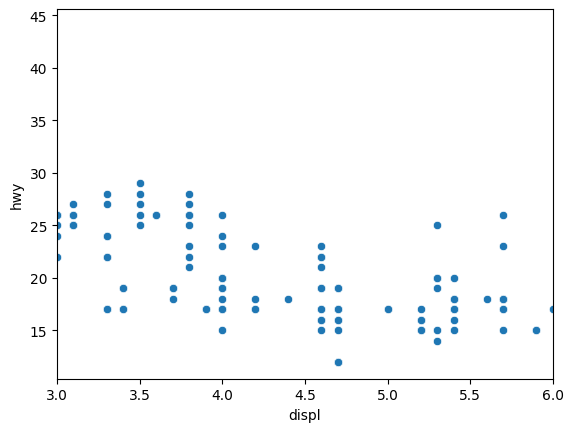

In [12]:
# X축 범위 3~6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
  .set(xlim = [3, 6])

[(3.0, 6.0), (10.0, 30.0)]

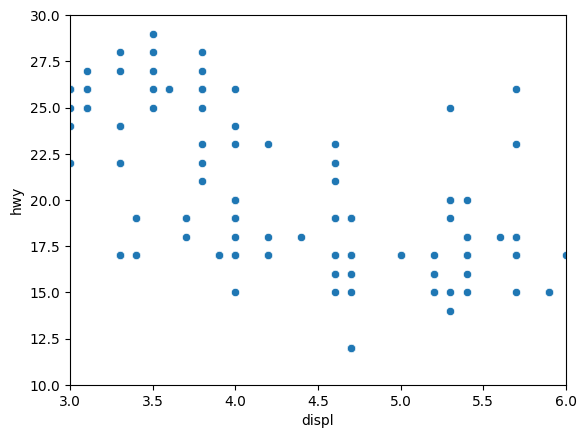

In [13]:
# X축 범위 3~6, y축 범위 70~30으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')\
    .set(xlim = [3, 6], ylim = [10, 30])

<Axes: xlabel='displ', ylabel='hwy'>

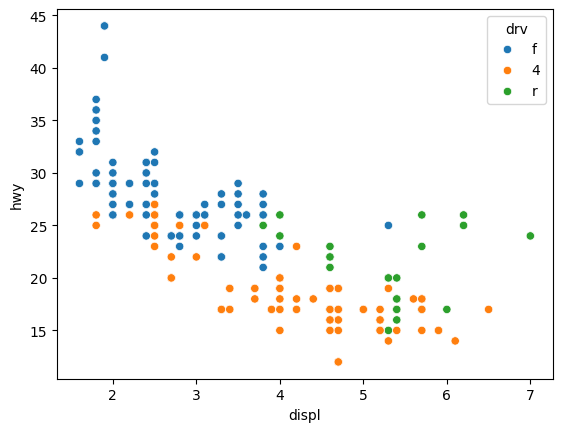

In [14]:
 # drv 별로 표식 색깔 다르게 豆현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

In [15]:
# 그래프 설정 바꾸기
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '150'})
plt.rcParams.update({'figure.figsize' : [8, 6]})
plt.rcParams.update({'font.size' : '15'})
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

In [16]:
# 모든 설정 되돌리기
plt.rcdefaults()

*문제
- mpg 데이터의 cty（도시 연비）와 hwy（고속도로 연비） 간에 어떤 관계가 있는지 알아보려고 합니다. X축은 cty, y축은 hwy로 된 산점도를 만들어 보세요
--> sns.SCatterpIOt（）을 이용해 산점도를 만들어 보세요.
- 미국의 지역별 인구통계 정보를 담은 midwest.csv> 이용해 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 합니다. X축은 POPtOtaI(전체 인구）, y축은 POPaSian（아시아인 인구）으로 된 산점도를 만들어 보세요 전체 인구는 50만 명 이하, 아시아인 인구는 1 만 명 이하인 지역만 산점도에 표시되게 설정하세요.
--> sns.set（）을 이용해 조건에 맞게 축을 설정하면 됩니다.

<Axes: xlabel='cty', ylabel='hwy'>

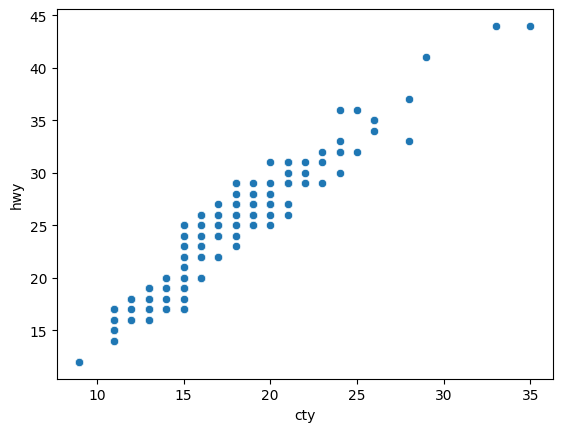

In [17]:
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

In [18]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

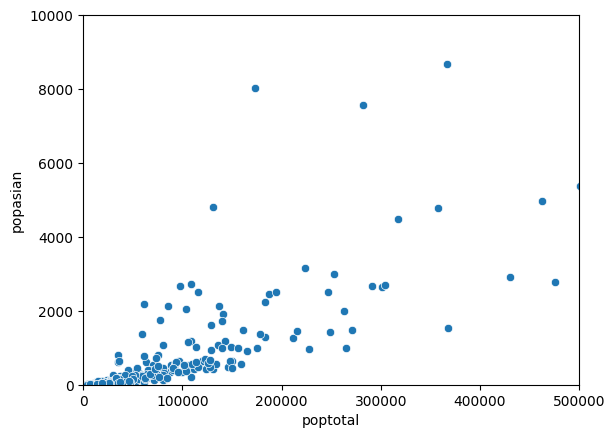

In [19]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
  .set(xlim = [0, 500000], ylim = [0,10000])

##평균 막대 그래프 만들기

In [20]:
# drv별 분리, hwy 평균 구하기
df_mpg = mpg.groupby('drv') \
  .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [21]:
# 변수를 인덱스로 바꾸지 않고 원래대로 유지. 0, 1, 2 등등
df_mpg = mpg.groupby('drv', as_index = False) \
  .agg(mean_hwy = ( 'hwy', 'mean' ))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

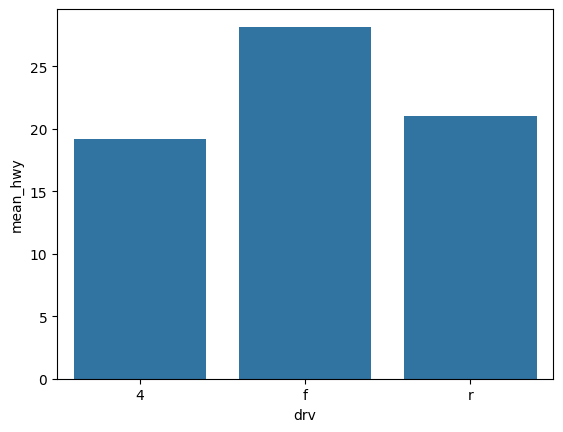

In [22]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

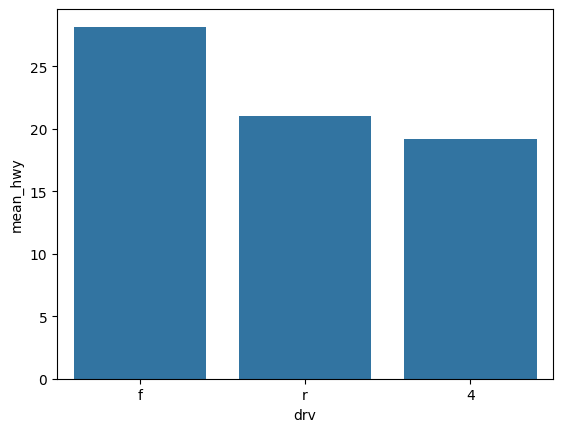

In [23]:
 # 데이터 프레임 정렬하刁
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
 # 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv' , y = 'mean_hwy')

In [24]:
 # 집단별 빈도표 만들フ/
df_mpg = mpg.groupby('drv', as_index = False) \
 .agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

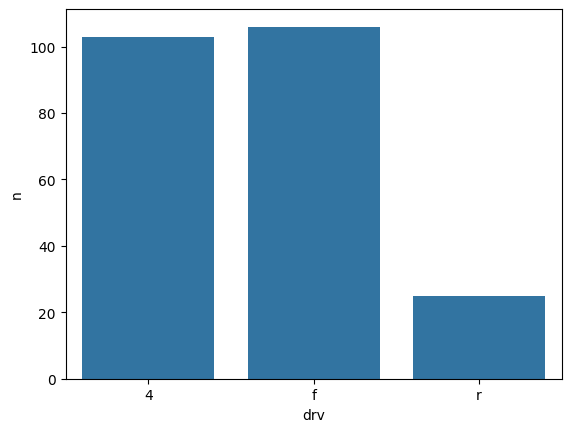

In [25]:
# 막대 그래프 만들刁
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<Axes: xlabel='drv', ylabel='count'>

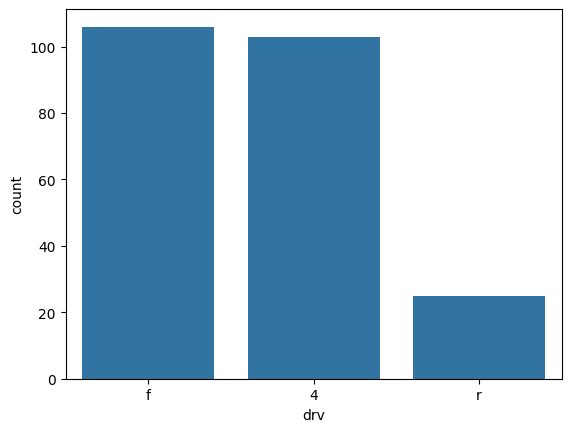

In [26]:
# 빈도 막대 그래프 만들フ/
sns.countplot(data = mpg, x = 'drv')

앞에서 만든 두 그래프는 X축 순서가 다릅니다. sns.barplot()로 만든 그래프는 X축 순서
가 4, f, r인 반면 SnS.countplot()로 만든그래프는 f, 4, r입니다. 이는 SnS.barplot()에
사용한 df_mpg와 SnS.countplot()에 사용한 df의 drv 값순서가 다르기 때문입니다.

In [27]:
 mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [28]:
 df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

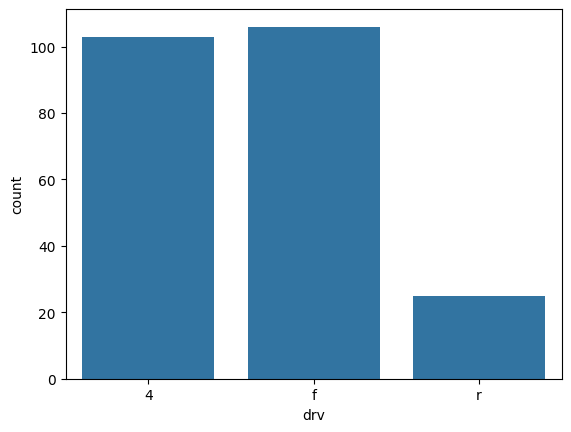

In [29]:
# 4, f, r 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [30]:
# drv의 값을 빈도가 높은 순으로 줄력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

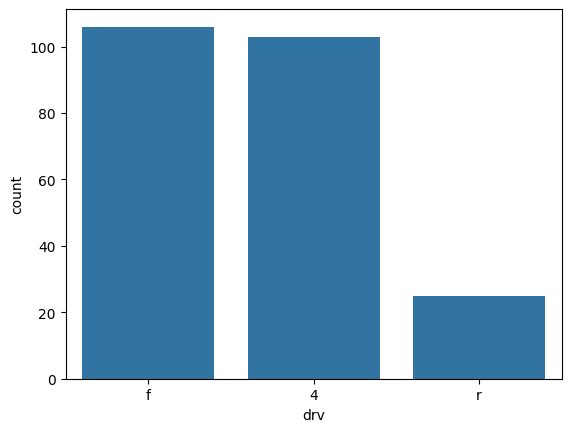

In [31]:
 # drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv',
 order = mpg['drv'].value_counts().index)

- 어떤 회사에서 생산한 'suv' 차종의 도시 연비가 높은지 알아보려고 합니다. ‘suv‘ 차종을 대
상으로 cty(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보세요 막대는 연비
가 높은 순으로 정 렬하세요.
--> 우선 그래프로 나타낼 집단별 평균표를 만들어야 합니다. df.query()로 'suv' 차종만 추출한 다음
groupby()와 agg()로 회사별 Cty 평균을 구하고 SOrt-VaIUeS()와 head()로 상위 5행을 추출하세요. 이렇게
만든 표를 sns.barplot()을 이용해 막대 그래프로 만들면 됩니다.
- 자동차 중에 어떤 CategOry(자동차 종류)가 많은지 알아보려고 합니다. sns.barplot()을 이
용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보세요. 막대는 빈도가 높은 순으로 정렬하
세요
--> 빈도가 높은 순으로 정렬해 빈도표를 만든 다음 sns.barplot()을 이용해 막대 그래프를 만들어 보세요

In [32]:
mpg = pd.read_csv('mpg.csv')

# suv 차종 추출, manufacturer별 분리, cty 평균 구하기, 내림차순 정렬, 상위 5행 추출

df = mpg.query('category == "suv"')\
  .groupby('manufacturer', as_index = False)\
  .agg(mean_cty = ('cty', 'mean'))\
  .sort_values('mean_cty', ascending = False)\
  .head()
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

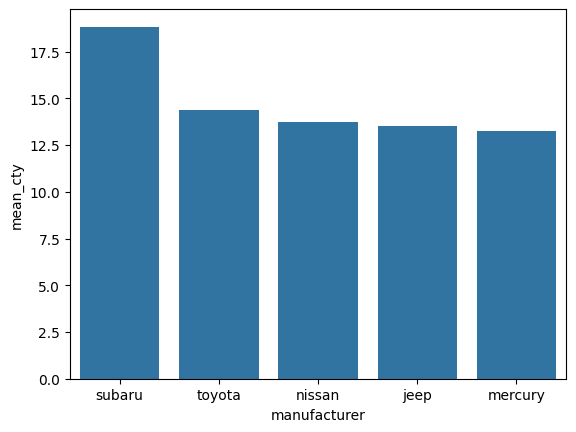

In [33]:
# sns. 211쪽 2번
sns.barplot(data = df,  x = 'manufacturer', y = 'mean_cty')

##선그래프
-sns.lineplot()

In [34]:
# economics 데이터 百러오기
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

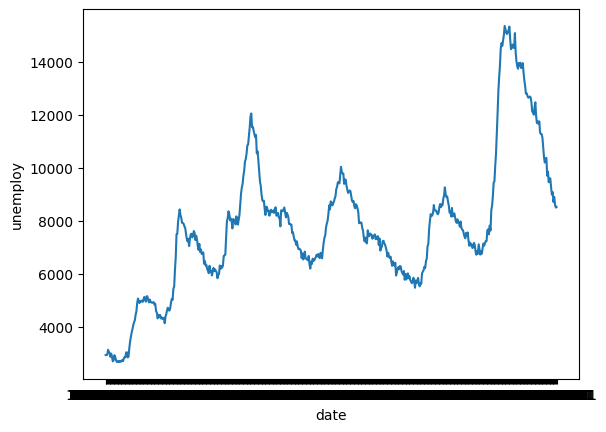

In [35]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [36]:
 # 날짜 시간 타입 변수 만들刁
economics['date2'] = pd.to_datetime(economics['date'])
 # 번수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [37]:
 economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [38]:
 #연추출
economics['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [39]:
 # 연도 변수 추가
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

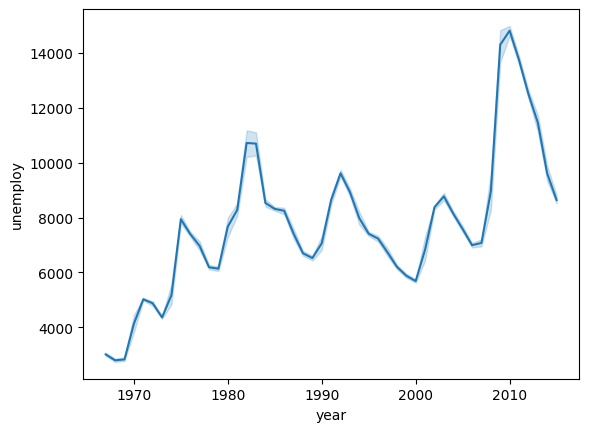

In [40]:
 # X축에 연도 豆시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

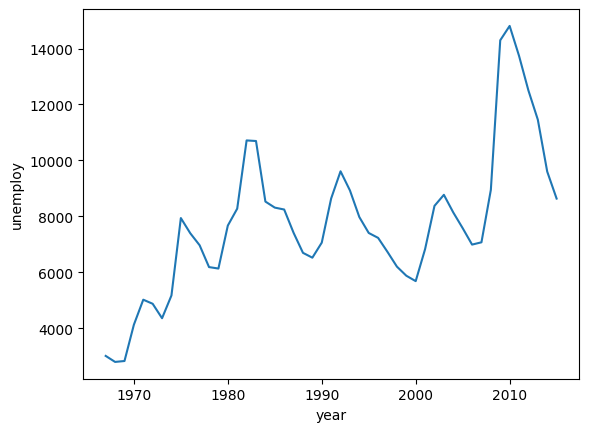

In [41]:
 # 신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None)

- psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보려고 합니다. 연도별 개인 저축률의 변화를 나타낸 시계열 그래프를 만들어 보세요.
- 2014년 월별 psavert°∣ 변화를 나타낸 시계열 그래프를 만들어 보세요.
--> df.dt.month를 이용해 ‘월‘을 나타낸 변수를 만든 다음 df.query()로 2014년 데이터를 추출해 선 그래프를 만들면 됩니다

<Axes: xlabel='year', ylabel='psavert'>

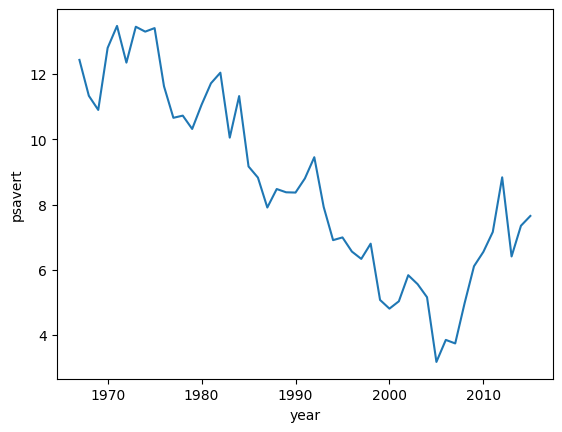

In [42]:
 # economics 데이터 불러오기
economics = pd.read_csv('economics.csv')
 # 날짜 시간 타입 변수 만들刁
economics['date2'] = pd.to_datetime(economics['date'])
 # 연도 변수 추가
economics['year'] = economics ['date2'].dt.year
 # 여도별 개인 저축률 선 그래프
sns.lineplot(data = economics, x = 'year', y = 'psavert', errorbar = None)

<Axes: xlabel='month', ylabel='psavert'>

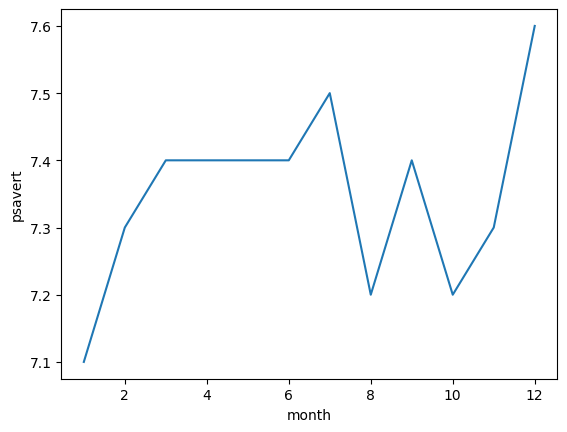

In [43]:
# 월 변수 추가
economics['month'] = economics['date2'].dt.month
 # 2014년 추출
df_2014 = economics.query('year == 2014')
 # 선 그래프 만들刁
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', errorbar = None)

*상자 그림으로 집단 간 분포 차이 표현하기

<Axes: xlabel='drv', ylabel='hwy'>

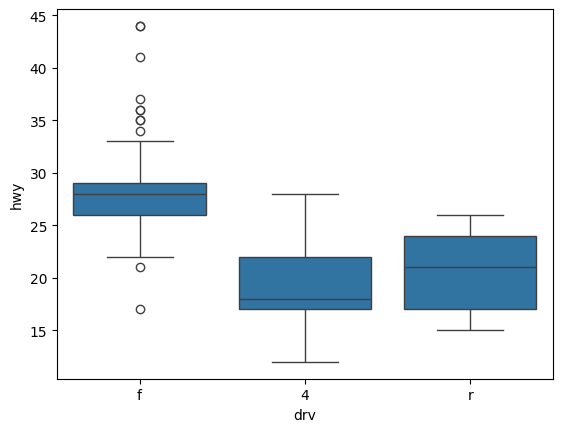

In [44]:
 sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

- CategOry（자동차 종류）가 'compact', 'subcompact', 'su∖√인 자동차의 cty（도시 연비）가 어떻게 다른지 비교해 보려고 합니다. 세 차종의 Cty를 나타낸 상자 그림을 만들어 보세요
--> 우선 df.query（）를 이용해 비교할 세 차종을 추출해야 합니다. 추출한 데이터를 이용해 sns.boxplot（）
으로 상자 그림을 만들면 됩 니다.

<Axes: xlabel='category', ylabel='cty'>

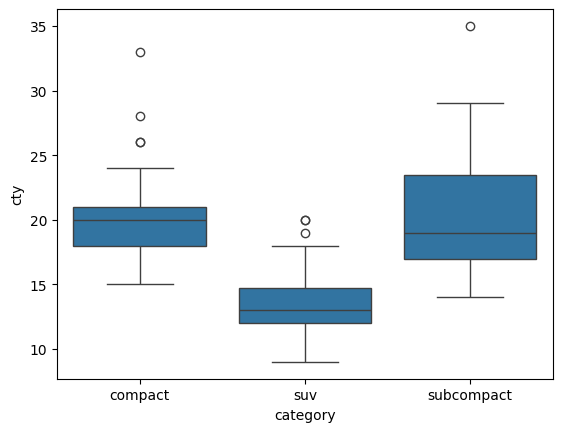

In [45]:
# mpg 데이터 불러오刁
mpg = pd.read_csv('mpg.csv')
 # compact, subcompact, suv 차종 추출
df = mpg.query('category in ["compact", "subcompact", "suv"]')
 # 상자 그림 만들刁
sns.boxplot(data = df, x = 'category', y = 'cty')

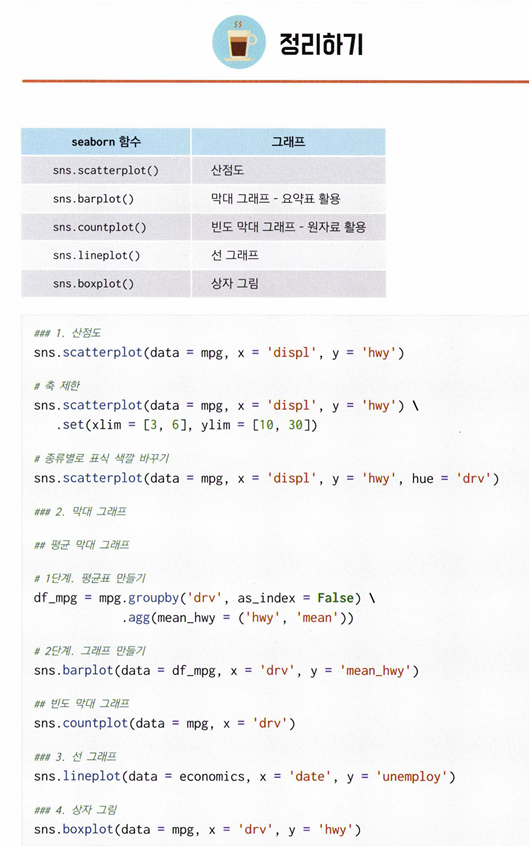

# 9장 데이터 분석 프로젝트

##한국복지패널 데이터 분석

In [46]:
 pip install pyreadstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 25.0 MB/s eta 0:00:00


In [47]:
 import pandas as pd
 import numpy as np
import seaborn as sns

In [48]:
# 데이터 물/오刁
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
# 복사본 만들フ/
welfare = raw_welfare.copy()

In [49]:
welfare #앞부분, 뒷부분 출력
welfare.shape
welfare.info()
welfare.describe() #요약 통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


In [50]:
welfare = welfare.rename(
    columns = {
        'h14_g3': 'sex',
        'h14_g4': 'birth',
        'h14_g10': 'marriage_type',
        'h14_g11': 'religion',
        'p1402_8aq1': 'income',
        'h14_eco9': 'code_job',
        'h14_reg7': 'code_region'
    })

In [51]:
welfare['sex'].value_counts() # 빈도 구하刁=이상치 확인

,count
sex,
2.0,7913
1.0,6505


In [52]:
# 만약 이상치가 있었다면? - 이상치 결측 처리
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])
# 결측치 확인
welfare['sex'].isna().sum()

0

In [53]:
 # 성녀 항목 이름 부火
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')
 # 빈도 구하力
welfare['sex']. value_counts()

,count
sex,
female,7913
male,6505


<Axes: xlabel='sex', ylabel='count'>

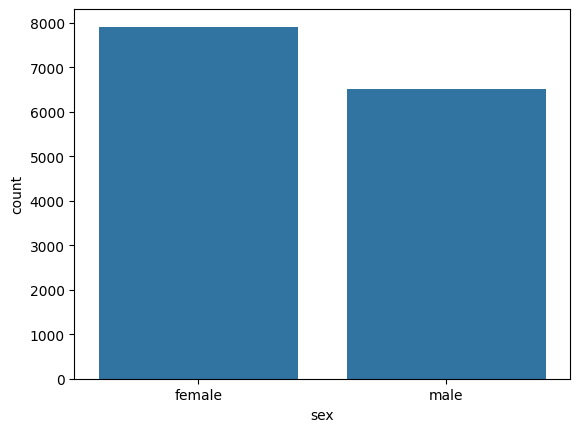

In [54]:
sns.countplot(data=welfare, x='sex')

In [55]:
welfare['income']. isna(). sum() # 결측치 확인

9884

In [56]:
# 이상치 결측 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan,
welfare['income'])

In [57]:
welfare['income']. isna(). sum() # 결측치 확인

9884

In [58]:
 # 성별 월급 평균표 만들刁
sex_income = welfare. dropna(subset = 'income' ) \
.groupby('sex', as_index = False) \
.agg(mean_income = ('income', 'mean'))
sex_income

#income 결측치 제거 -> sex별 분리 -> income 평균 구하기

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

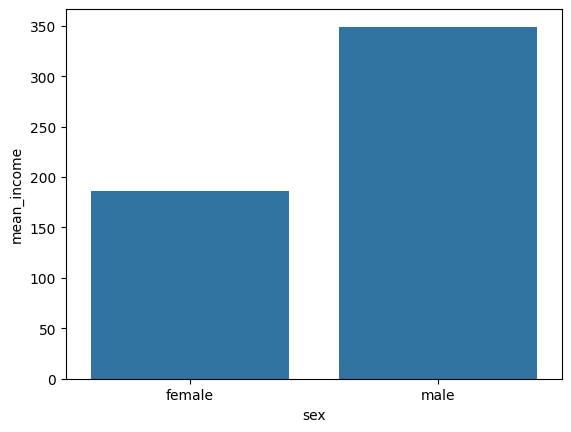

In [59]:
sns.barplot(data = sex_income, x = 'sex', y = 'mean_income')

##나이와 월급의 관계
-분석 절차
- 1단계: 변수 검토 및 전처리
- 나이, 월급
- 2단계: 변수 간 관계 분석
- 나이에 따른 월급 평균표 만들기, 그래프 만들기

In [60]:
# 변수 검토
welfare['birth'].dtypes

dtype('float64')

In [61]:
welfare['birth'].describe()

,birth
count,14418.000000
mean,1969.280205
std,24.402250
min,1907.000000
25%,1948.000000
50%,1968.000000
75%,1990.000000
max,2018.000000


<Axes: xlabel='birth', ylabel='Count'>

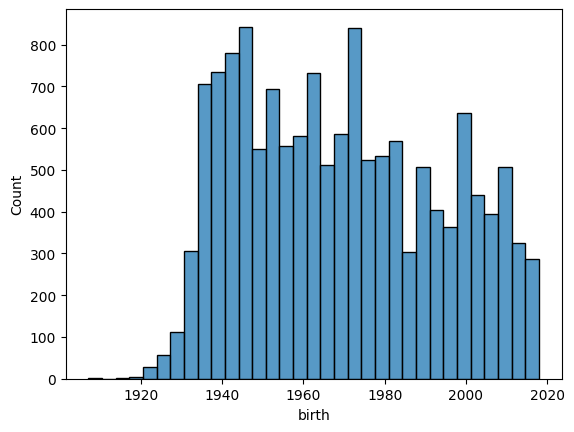

In [62]:
sns.histplot(data = welfare, x = 'birth')

In [63]:
# 전처리하기 -> 태어난 연도는 '모름/무응답'일 경우 9999로 코딩돼있음.
welfare['birth'].describe()

,birth
count,14418.000000
mean,1969.280205
std,24.402250
min,1907.000000
25%,1948.000000
50%,1968.000000
75%,1990.000000
max,2018.000000


In [64]:
welfare['birth'].isna().sum()

0

In [65]:
# 파생 변수 만들기 -> 2019년에 조사된 결과라서 2019-태어난 연도+1
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

,age
count,14418.000000
mean,50.719795
std,24.402250
min,2.000000
25%,30.000000
50%,52.000000
75%,72.000000
max,113.000000


<Axes: xlabel='age', ylabel='Count'>

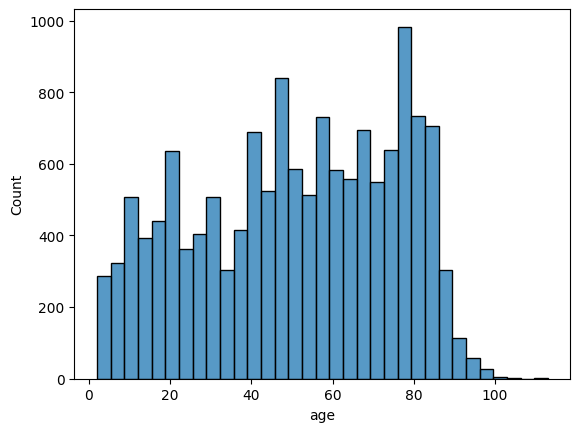

In [66]:
sns.histplot(data = welfare, x = 'age')

In [67]:
# 나이에 따른 월급 평균표
age_income = welfare.dropna(subset = 'income') \
  .groupby('age') \
  .agg(mean_income = ('income', 'mean'))
age_income.head()

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471


<Axes: xlabel='age', ylabel='mean_income'>

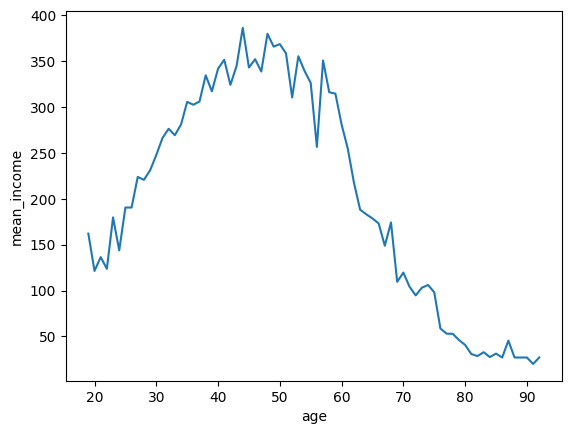

In [68]:
sns.lineplot(data = age_income, x = 'age', y = 'mean_income')

##연령대에 따른 월급 차이
- 나이를 연령대별로 분류한 다음 월급 비교

In [69]:
welfare['age'].head()

,age
0,75.0
1,72.0
2,78.0
3,58.0
4,57.0


In [70]:
# 파생변수(나이->연령대) 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                                                'old')))
welfare['ageg'].value_counts()

,count
ageg,
old,5955
middle,4963
young,3500


<Axes: xlabel='ageg', ylabel='count'>

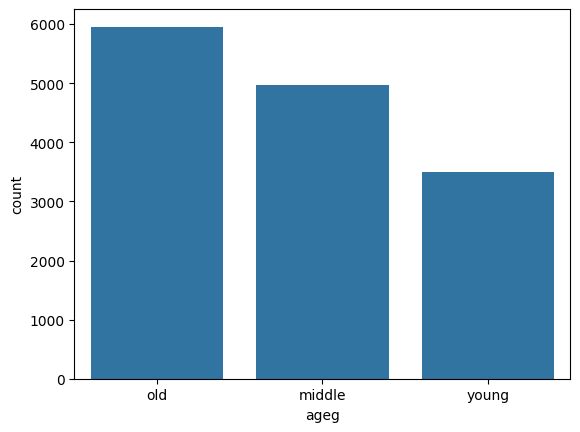

In [71]:
sns.countplot(data = welfare, x = 'ageg')

In [72]:
ageg_income = welfare.dropna(subset = 'income') \
                      .groupby('ageg', as_index = False) \
                      .agg(mean_income = ('income', 'mean'))

<Axes: xlabel='ageg', ylabel='mean_income'>

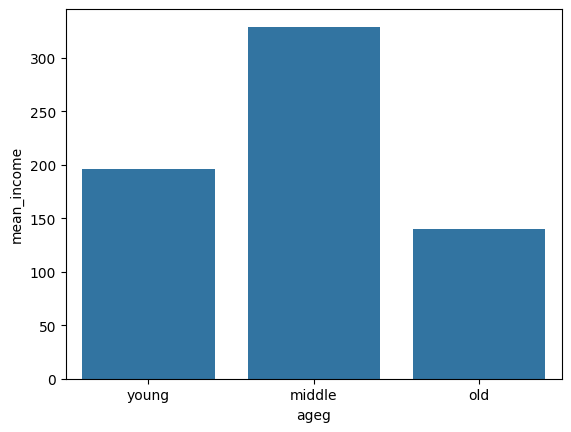

In [73]:
sns.barplot(data = ageg_income, x = 'ageg', y = 'mean_income',
            order = ['young', 'middle', 'old'])

##연령대 및 성별 월급 차이
- 전처리는 앞에서 했으니 생략.

In [74]:
# 연령대 및 성별 평균표 만들기
sex_income = \
  welfare.dropna(subset = 'income') \
         .groupby(['ageg', 'sex'], as_index = False) \
         .agg(mean_income = ('income', 'mean'))
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

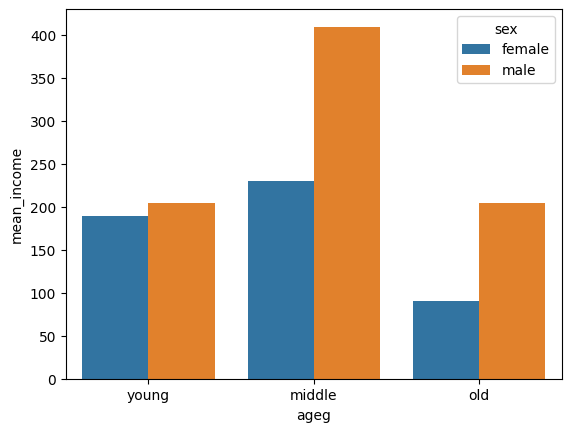

In [75]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue = 'sex',
            order = ['young', 'middle', 'old'])

In [76]:
# 연령대별로 구분하지 않고 나이로!
sex_age = \
  welfare.dropna(subset = 'income') \
         .groupby(['age', 'sex'], as_index = False) \
         .agg(mean_income = ('income', 'mean'))
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<Axes: xlabel='age', ylabel='mean_income'>

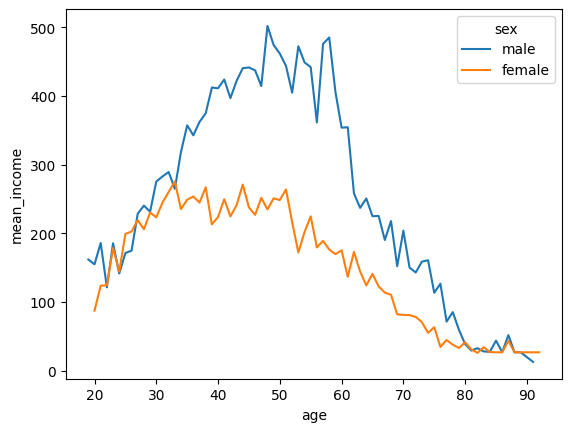

In [77]:
# 선 그래프 만들フ/
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue = 'sex')

## 직업별 월급 차이

In [78]:
# 직업 전처리
list_job = pd. read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [79]:
# weIfare에 list_job 결합하フ/
welfare = welfare.merge(list_job, how = 'left', on = 'code_job')

In [80]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset = 'code_job' )[[ 'code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [81]:
 # 직업별 월급 평균표 만들刁
job_income = welfare.dropna(subset = ['job', 'income' ])\
            .groupby( 'job', as_index = False)\
            .agg(mean_income = ( 'income', 'mean' ))
job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [82]:
 # 상위 10위 추출
top10 = job_income.sort_values('mean_income', ascending = False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [83]:
 # 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'Malgun Gothic'})

<Axes: xlabel='mean_income', ylabel='job'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*arg

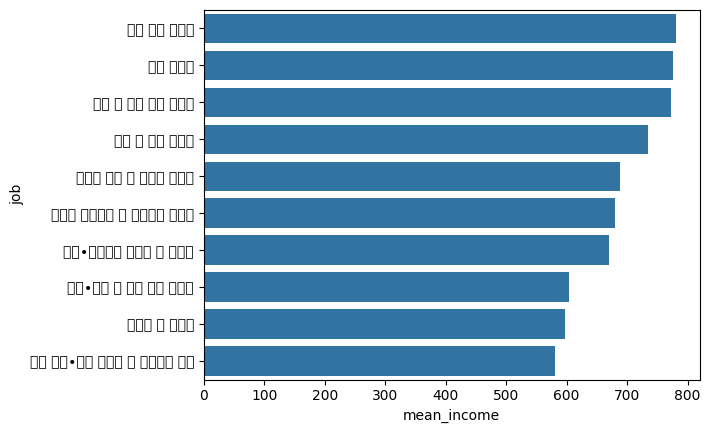

In [84]:
 # 막대 그래프 만들刁
sns.barplot(data = top10, y = 'job', x = 'mean_income')

## 성별 직업 빈도

In [85]:
 # 남성 직업 빈도 상위 10개 추출
job_male = welfare.dropna(subset = 'job') \
.query('sex == "male"') \
 .groupby('job' , as_index = False) \
. agg(n = ('job' , 'count' )) \
.sort_values('n' , ascending = False) \
.head(10)
job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [86]:
 # 여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset = 'job') \
.query('sex == "female"') \
 .groupby('job' , as_index = False) \
. agg(n = ('job' , 'count' )) \
.sort_values('n' , ascending = False) \
.head(10)
job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*ar

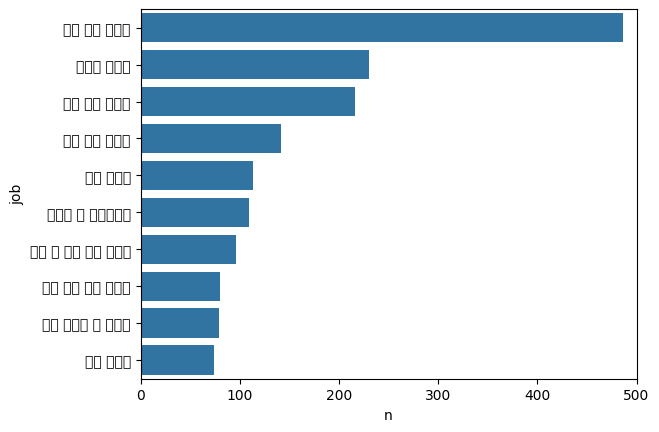

In [87]:
 # 남성 직업 빈도 막대 그래프 만들刁
sns.barplot(data = job_male, y = 'job', x = 'n').set(xlim = [0, 500])

[(0.0, 500.0)]

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  func(*ar

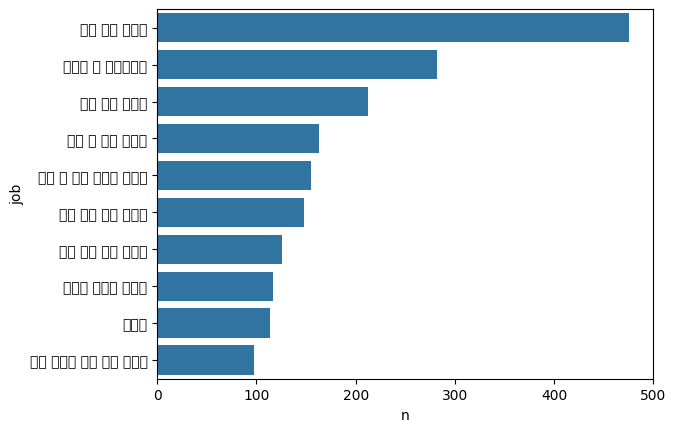

In [88]:
 # 여성 직업 빈도 막대 그래프 만들刁
sns.barplot(data = job_female, y = 'job', x = 'n').set(xlim = [0, 500])

## 종교 유무에 따른 이혼율  -> 오류 발생

In [89]:
# 1. 변수 검토하기
welfare['religion'].dtypes

dtype('float64')

In [90]:
welfare['religion'].value_counts()

,count
religion,
2.0,7815
1.0,6603


In [91]:
print(welfare.columns)

Index(['h14_id', 'h14_ind', 'h14_sn', 'h14_merkey', 'h_new', 'h14_cobf',
       'p14_wsc', 'p14_wsl', 'p14_wgc', 'p14_wgl',
       ...
       'wc14_5aq5', 'wc14_5aq6', 'h14_pers_income1', 'h14_pers_income2',
       'h14_pers_income3', 'h14_pers_income4', 'h14_pers_income5', 'age',
       'ageg', 'job'],
      dtype='object', length=833)


## 지역별 연령대 비율

In [92]:
welfare['code_region'].dtypes

dtype('float64')

In [93]:
welfare['code_region'].value_counts()

,count
code_region,
2.0,3246
7.0,2466
3.0,2448
1.0,2002
4.0,1728
5.0,1391
6.0,1137


In [94]:
 # 지역 크드 목록 만들刁
list_region = pd.DataFrame({'code_region' : [1,2,3,4,5,6,7],
                            'region' : ['서울',
                                        '수도권(인천/경기)',
                                        '부산/경남/울산',
                                        '대구/경북',
                                        '대전/충남',
                                        '강원/충북',
                                        '광주/전남/전북/제주도']})

In [95]:
# 지역명 변수 추가
welfare = welfare.merge(list_region, how = 'left', on = 'code_region')
welfare[['code_region', 'region']].head()

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울


In [96]:
region_ageg = welfare.groupby('region' , as_index = False) \
              ['ageg'] \
              .value_counts(normalize = True)
region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [97]:
 # 백분율로 바꾸기
# 반올림
region_ageg = \
  region_ageg.assign(proportion = region_ageg ['proportion'] * 100) \
 .round(1)
region_ageg

,region,ageg,proportion
0,강원/충북,old,45.9
1,강원/충북,middle,30.9
2,강원/충북,young,23.2
3,광주/전남/전북/제주도,old,44.9
4,광주/전남/전북/제주도,middle,31.8
5,광주/전남/전북/제주도,young,23.3
6,대구/경북,old,50.4
7,대구/경북,middle,29.6
8,대구/경북,young,20.0
9,대전/충남,old,41.3


<Axes: xlabel='proportion', ylabel='region'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func

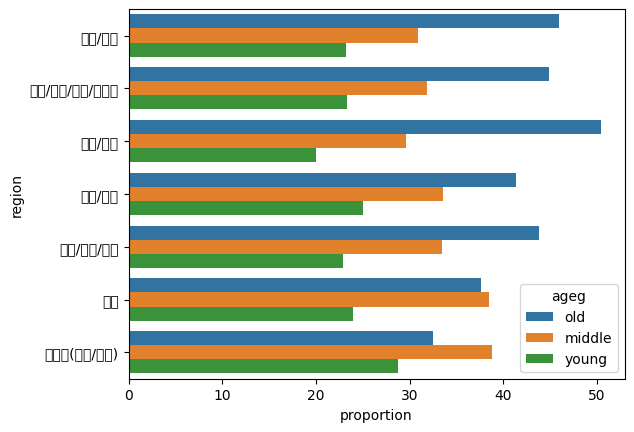

In [98]:
 # 막대 그래프 만들刁
sns.barplot(data = region_ageg, y = 'region', x = 'proportion', hue = 'ageg')

## 피벗하기
- 앞 그래프는 각 지역의 연령대별 비율이 서로 다른 막대로 표현돼있어서 지역끼리 비교가 어려움. -> 행과 열을 회전해 표의 구성을 바꾸는 작업!

In [99]:
pivot_df = \
    region_ageg[['region', 'ageg', 'proportion']].pivot(index = 'region', columns = 'ageg', values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<Axes: ylabel='region'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52649 (\N{HANGUL SYLLABLE CUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48513 (\N{HANGUL SYLLABLE BUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func

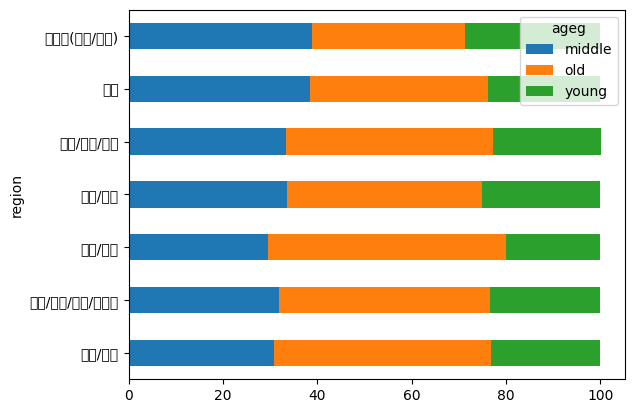

In [100]:
pivot_df.plot.barh(stacked = True)

In [101]:
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


In [102]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/DA_week3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/DA_week3.ipynb to html
[NbConvertApp] Writing 2112660 bytes to /content/drive/MyDrive/Colab Notebooks/DA_week3.html
